In [1]:
# define logging and working directory
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
from src.utils.Notebook_imports import *
#from pyforest import *

import random
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})
import pandas as pd
import numpy as np
import os

from ipywidgets import interact
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline
%reload_ext autoreload
%autoreload 2

search for root_dir and set working directory
Working directory set to: /mnt/ssd/git/dynamic-cmr-models


In [2]:
def plotff(ff, t=0, z_abs=0, N=1):
    nx, ny = (ff.shape[3], ff.shape[2])
    X, Y = np.mgrid[0:nx, 0:ny]
    X, Y = (X[::N, ::N], Y[::N, ::N])
    U = ff[t, z_abs, ::N, ::N, 2]  # x
    V = ff[t, z_abs, ::N, ::N, 1]
    return X,Y,U,V

In [282]:
def get_toy_flows(t=5, f_shape = (1,5,10,10,10,3)):
     # b,t,z,y,x,c with order of c = z,y,x
    ff_empty = np.zeros(f_shape)

    # create some fake data
    # t: 0-4, axis 1
    ff_empty[:,0,:,0,0,:] = 1
    ff_empty[:,1,:,1,1,:] = 1
    ff_empty[:,2,:,2,2,:] = -1
    ff_empty[:,3,:,1,1,:] = -1
    ff_empty[:,4,:,0,0,1] = 0.2
    # slice length
    return ff_empty[:,:t,...]

In [283]:
# hard-coded examples
f_shape = (10, 10,10,10,3)
#ff = np.random.rand(*f_shape)
ff = np.ones(f_shape)
ff2 = ff.copy()
ff2[...,1] = 0
ff3=ff.copy()
ff3[...,2]=-1
print(ff.shape)

(10, 10, 10, 10, 3)


In [106]:
def plot_flows(flows):
    if type(flows) != type([]):
        flows = [flows]
    fig, ax = plt.subplots(1, len(flows), figsize=(5*len(flows), 5))
    if len(flows) ==1:
        ax = [ax]
    for i in range(len(flows)):
        ax[i].quiver(*plotff(flows[i]), units='xy', angles='xy', scale=1, color='k')

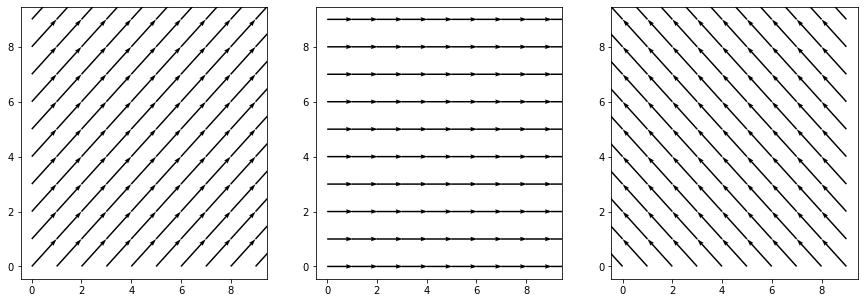

In [5]:
# plot 3 different flows
plot_flows([ff,ff2, ff3])

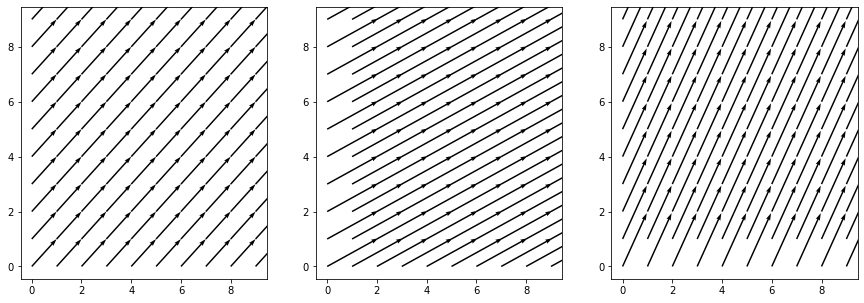

In [6]:
# compose these three flow fields with addition
plot_flows([ff,ff+ff2, ff+ff2+ff3])

# Compose tests - optimal case
compose vectors with a direction 1.0 (diagonal)

(1, 5, 10, 10, 10, 3)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


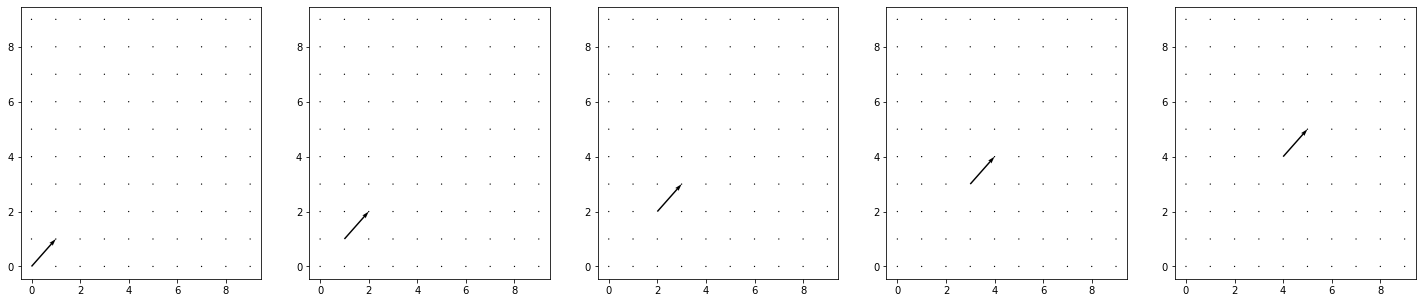

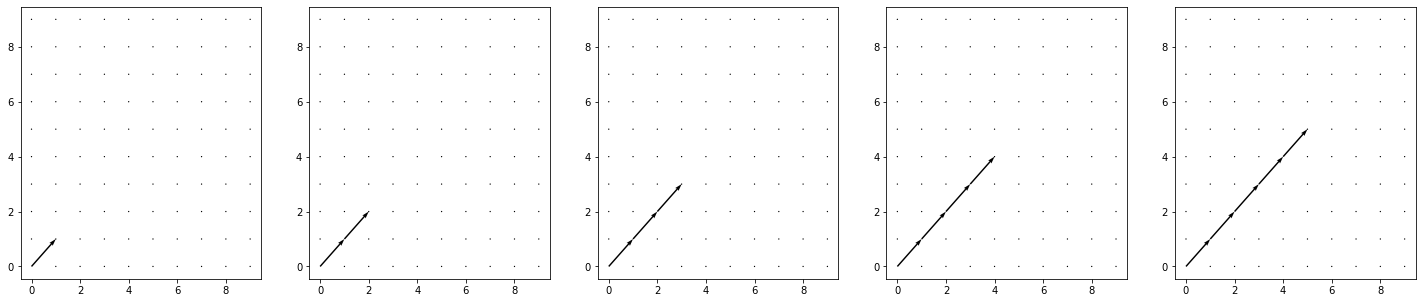

In [318]:
from src.models.Models import create_dense_compose
f_shape = (1,10,10,10,3)
ff_empty = np.zeros(f_shape)

flows = []
for i in range(5):
    ff_temp = ff_empty.copy()
    ff_temp[:,:,i,i] = 1
    flows.append(ff_temp)
flows_stacked = np.concatenate(flows, axis=0)[None,...]
plot_flows(flows)
print(flows_stacked.shape)

# compose
comp = create_dense_compose(config={'FORWARD':False})
comps = comp(flows_stacked)
comps.shape
print(np.diagonal(comps[0,4,0,...,1:]).T[:t])
# plot compose
comps_unstacked = np.split(comps.numpy()[0],indices_or_sections=5, axis=0)
plot_flows(comps_unstacked)

# Compose tests - too short

compose vectors with a direction 0.8

(1, 5, 10, 10, 10, 3)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


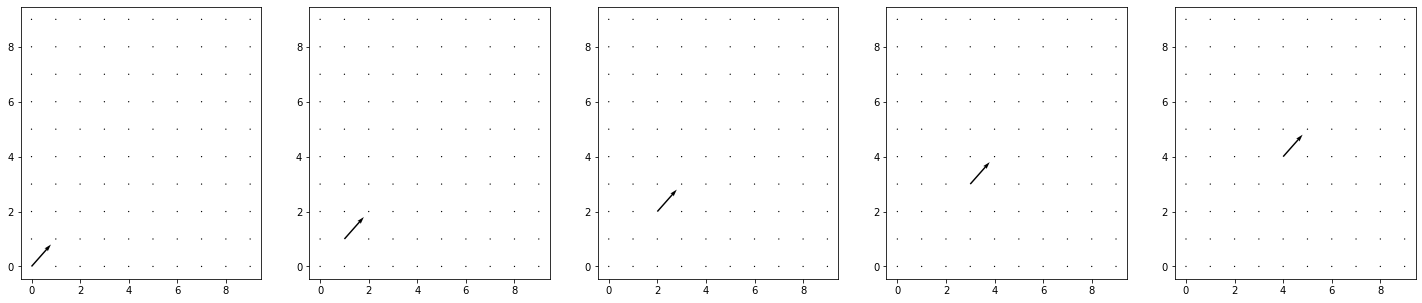

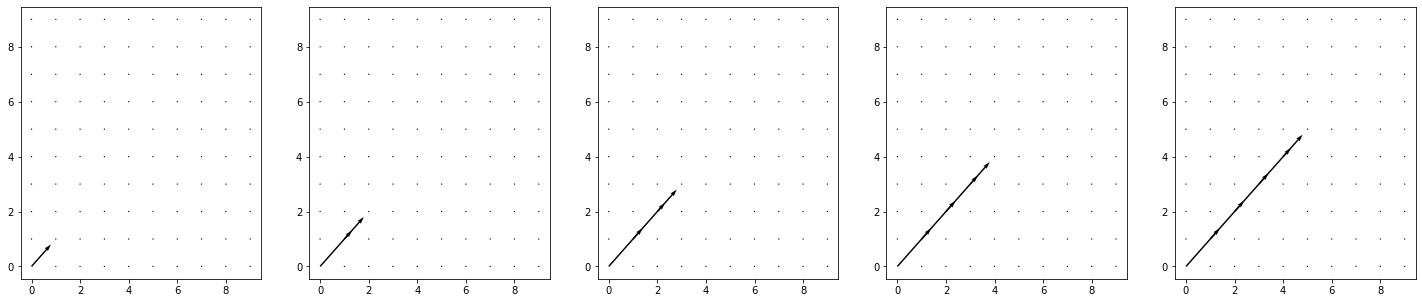

In [32]:
from src.models.Models import create_dense_compose
f_shape = (1,10,10,10,3)
ff_empty = np.zeros(f_shape)

flows = []
for i in range(5):
    ff_temp = ff_empty.copy()
    ff_temp[:,:,i,i] = 0.8
    flows.append(ff_temp)
flows_stacked = np.concatenate(flows, axis=0)[None,...]
plot_flows(flows)
print(flows_stacked.shape)

# compose
comp = create_dense_compose(config={})
comps = comp(flows_stacked)
comps.shape

# plot compose
comps_unstacked = np.split(comps.numpy()[0],indices_or_sections=5, axis=0)
plot_flows(comps_unstacked)

# Compose tests - too long

compose vectors with a direction 1.4

(1, 5, 10, 10, 10, 3)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


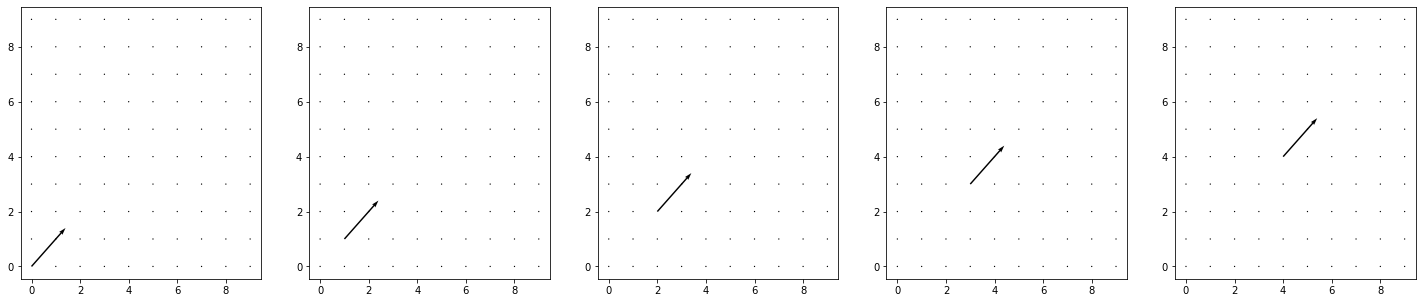

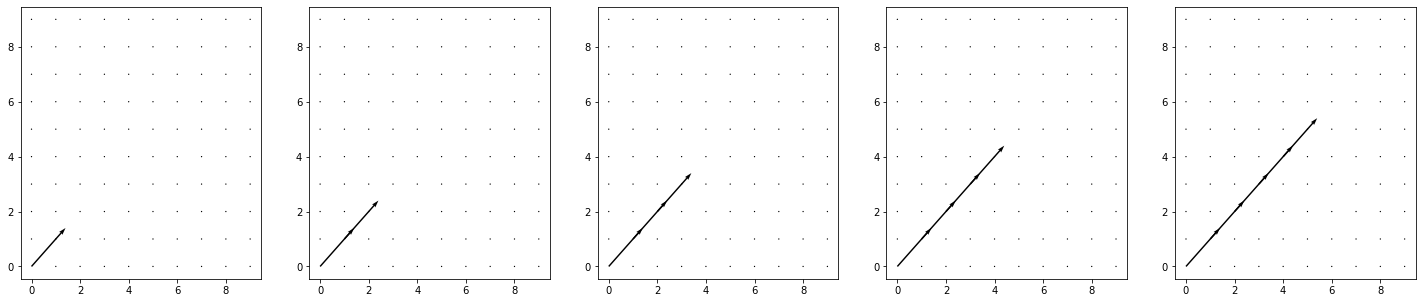

In [42]:
#### from src.models.Models import create_dense_compose
f_shape = (1,10,10,10,3)
ff_empty = np.zeros(f_shape)

flows = []
for i in range(5):
    ff_temp = ff_empty.copy()
    ff_temp[:,:,i,i] = 1.4
    flows.append(ff_temp)
flows_stacked = np.concatenate(flows, axis=0)[None,...]
plot_flows(flows)
print(flows_stacked.shape)

# compose
comp = create_dense_compose(config={'REVERSE_COMPOSE':True})
comps = comp(flows_stacked)
comps.shape

# plot compose
comps_unstacked = np.split(comps.numpy()[0],indices_or_sections=5, axis=0)
plot_flows(comps_unstacked)

# Compose tests - changing direction

(reverse==True, direction = 1, inverted after t=2)

(1, 5, 10, 10, 10, 3)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


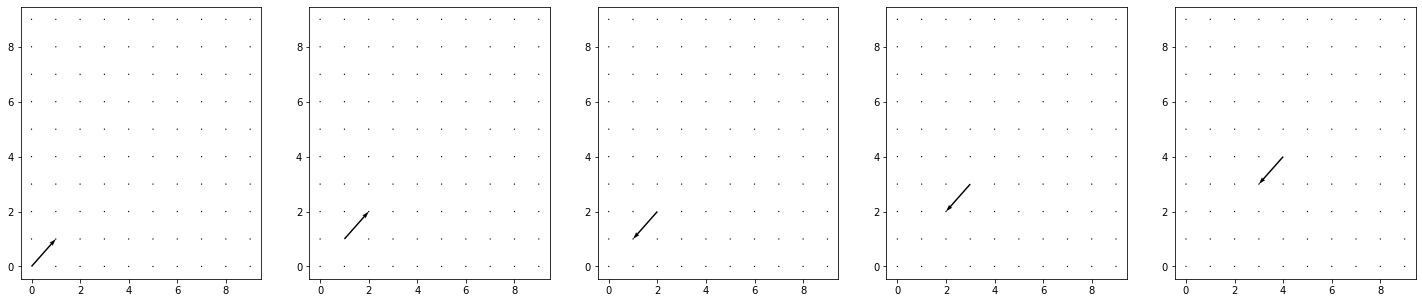

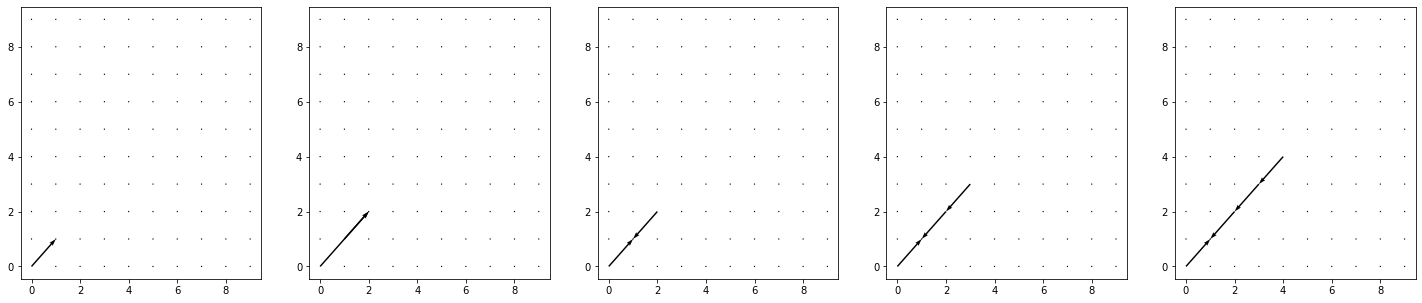

In [97]:
#### from src.models.Models import create_dense_compose
f_shape = (1,10,10,10,3)
ff_empty = np.zeros(f_shape)

flows = []
direction = 1
for i in range(5):
    if i==2:
        direction = direction*-1
    ff_temp = ff_empty.copy()
    ff_temp[:,:,i,i] =direction
    flows.append(ff_temp)
flows_stacked = np.concatenate(flows, axis=0)[None,...]
plot_flows(flows)
print(flows_stacked.shape)

# compose
comp = create_dense_compose(config={'REVERSE_COMPOSE':True})
comps = comp(flows_stacked)
comps.shape

# plot compose
comps_unstacked = np.split(comps.numpy()[0],indices_or_sections=5, axis=0)
plot_flows(comps_unstacked)

In [99]:
comps_unstacked[2][0,0,0:3,0:3,:]

array([[[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [-1., -1., -1.]]], dtype=float32)

In [319]:
#### from src.models.Models import create_dense_compose
@interact
def composelayer_test(t=(2,5)):

    ff_empty = get_toy_flows()

    flows = np.split(ff_empty[0],indices_or_sections=5, axis=0)
    plot_flows(flows)
    print(ff_empty.shape)

    # compose
    comp = create_dense_compose(config={'REVERSE_COMPOSE':True})
    comps = comp(ff_empty)
    print(comps.shape)

    # plot compose
    comps_unstacked = np.split(comps.numpy()[0],indices_or_sections=5, axis=0)
    print('vectors of comp: {}'.format(t))
    print( np.diagonal(comps[0,t,0,...,1:]).T[:t])
    plot_flows(comps_unstacked)
    

interactive(children=(IntSlider(value=3, description='t', max=5, min=2), Output()), _dom_classes=('widget-inte…

# Compose tests - ComposeTransformLayer

How does this layer compose a list of shifted vectors 

In [313]:
from src.models.KerasLayers import ComposeTransform
@interact
def ComposeLayer_test(t=(2,5), forward=False):

    ff_empty = get_toy_flows(t=t)

    flows_temp = np.split(ff_empty[0],indices_or_sections=t, axis=0)
    plot_flows(flows_temp)
    if not forward:
        flows_temp = list(reversed(flows_temp)) 

    compose = ComposeTransform(interp_method='nearest', shift_center=True, indexing='ij',
                                      name='Compose_transform', dtype=np.float32)(flows_temp)
    
    print(len(flows_temp))
    # print the diagonal values along x/y
    print(np.diagonal(compose[0,0,...,1:]).T[:t])
    plot_flows([compose])
    

interactive(children=(IntSlider(value=3, description='t', max=5, min=2), Checkbox(value=False, description='fo…

# Compose tests - simple add

In [304]:
from src.models.KerasLayers import ComposeTransform
@interact
def add_test(t=(1,5)):

    f_shape = (1,5,10,10,10,3) # b,t,z,y,x,c with order of c = z,y,x
    ff_empty = np.zeros(f_shape)

    # create some fake data
    # t: 0-4, axis 1
    ff_empty[:,0,:,0,0,:] = 1
    ff_empty[:,1,:,1,1,:] = 1
    ff_empty[:,2,:,2,2,:] = -1
    ff_empty[:,3,:,1,1,:] = -1
    ff_empty[:,4,:,0,0,1] = 0.2
    
    flows = ff_empty[:,:t,...]
    compose = np.sum(flows,axis=1, keepdims=False)
    print(compose.shape)
    plot_flows(np.split(flows[0], t,axis=0))
    print(len(flows_temp))
    plot_flows([compose])
    # return the diagonal values along x/y
    return np.diagonal(compose[0,0,...,1:]).T[:t]

interactive(children=(IntSlider(value=3, description='t', max=5, min=1), Output()), _dom_classes=('widget-inte…

# Compose tests -  SITK DisplacementFieldTranform

In [172]:
#
# This function displays the effects of the deformable transformation on a grid of points by scaling the
# initial displacements (either of control points for BSpline or the deformation field itself). It does
# assume that all points are contained in the range(-2.5,-2.5), (2.5,2.5).
#
from ipywidgets import interact, fixed
def display_displacement_scaling_effect(
    s, original_x_mat, original_y_mat, tx, original_control_point_displacements
):
    if tx.GetDimension() != 2:
        raise ValueError("display_displacement_scaling_effect only works in 2D")

    plt.scatter(
        original_x_mat,
        original_y_mat,
        marker="o",
        color="blue",
        label="original points",
    )
    pointsX = []
    pointsY = []
    tx.SetParameters(s * original_control_point_displacements)

    for index, value in np.ndenumerate(original_x_mat):
        px, py = tx.TransformPoint((value, original_y_mat[index]))
        pointsX.append(px)
        pointsY.append(py)

    plt.scatter(pointsX, pointsY, marker="^", color="red", label="transformed points")
    plt.legend(loc=(0.25, 1.01))
    plt.xlim((-2.5, 2.5))
    plt.ylim((-2.5, 2.5))

In [311]:
# Create the displacement field.

# When working with images the safer thing to do is use the image based constructor,
# sitk.DisplacementFieldTransform(my_image), all the fixed parameters will be set correctly and the displacement
# field is initialized using the vectors stored in the image. SimpleITK requires that the image's pixel type be
# sitk.sitkVectorFloat64.
displacement = sitk.DisplacementFieldTransform(2)
field_size = [10, 20]
field_origin = [-1.0, -1.0]
field_spacing = [2.0 / 9.0, 2.0 / 19.0]
field_direction = [1, 0, 0, 1]  # direction cosine matrix (row major order)

# Concatenate all the information into a single list
displacement.SetFixedParameters(
    field_size + field_origin + field_spacing + field_direction
)
# Set the interpolator, either sitkLinear which is default or nearest neighbor
displacement.SetInterpolator(sitk.sitkNearestNeighbor)

originalDisplacements = np.random.random(len(displacement.GetParameters()))
displacement.SetParameters(originalDisplacements)

coordsX = np.linspace(
    field_origin[0],
    field_origin[0] + (field_size[0] - 1) * field_spacing[0],
    field_size[0],
)
coordsY = np.linspace(
    field_origin[1],
    field_origin[1] + (field_size[1] - 1) * field_spacing[1],
    field_size[1],
)
XX, YY = np.meshgrid(coordsX, coordsY)

interact(
    display_displacement_scaling_effect,
    s=(-1.5, 1.5),
    original_x_mat=fixed(XX),
    original_y_mat=fixed(YY),
    tx=fixed(displacement),
    original_control_point_displacements=fixed(originalDisplacements),
);

interactive(children=(FloatSlider(value=0.0, description='s', max=1.5, min=-1.5), Output()), _dom_classes=('wi…

# Compose tests -  ITK CompositeTransform

In [278]:
def compose_flows_itk(flows, forward=False):

    # get a list with n timesteps of displacement fields transforms.
    # needed to compose the timesteps afterwards.
    t = []
    for timestep in range(flows.shape[0]):
        arr = flows[timestep, ...].astype('float64')
        img = sitk.GetImageFromArray(arr=arr, isVector=True)
        img.SetOrigin(origin=(0, 0, 0))
        img.SetSpacing(spacing=(1, 1, 1))
        t.append(sitk.DisplacementFieldTransform(img))

    # "The transforms are composed in reverse order with the back being applied first"
    # https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1CompositeTransform.html
    
    if forward:
        transform = sitk.CompositeTransform(t)
        
    else:
        print(len(t))
        transform = sitk.CompositeTransform(list(reversed(t)))

    disp_filter = sitk.TransformToDisplacementFieldFilter()
    disp_filter.SetReferenceImage(refImage=sitk.GetImageFromArray(arr=flows[0], isVector=True))
    composed = sitk.GetArrayFromImage(disp_filter.Execute(transform))

    return composed
    
    

In [307]:
@interact
def itk_test(t=(2,5), forward=False):

    flows = get_toy_flows(t=t)
    compose = compose_flows_itk(flows[0], forward=forward)[np.newaxis,...]
    
    print(flows.shape)
    print(compose.shape)
    # return the diagonal values along x/y
    print(np.diagonal(compose[0,0,...,1:]).T[:t])
    plot_flows(np.split(flows[0], t,axis=0))
    plot_flows([compose])
    

interactive(children=(IntSlider(value=3, description='t', max=5, min=2), Checkbox(value=False, description='fo…

In [174]:
def compose_sitk(nda, Z_SLICES, method='forward'):
    '''
    flowfield composition with sitk algorithms
    input: tzyxc with c=zyx
    output: same
    '''

    # get a list with n timesteps of displacement fields transforms.
    # needed to compose the timesteps afterwards.
    t = []
    for timestep in range(nda.shape[0]):
        arr = nda[timestep, Z_SLICES, ...].astype('float64')
        img = sitk.GetImageFromArray(arr=arr, isVector=True)
        img.SetOrigin(origin=(0, 0, 0))
        img.SetSpacing(spacing=(1, 1, 1))
        t.append(sitk.DisplacementFieldTransform(img))

    # "The transforms are composed in reverse order with the back being applied first"
    # https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1CompositeTransform.html
    
    if method == 'forward':
        transform0 = sitk.CompositeTransform([t[0]])
        transform1 = sitk.CompositeTransform([t[0], t[1]])
        transform2 = sitk.CompositeTransform([t[0], t[1], t[2]])
        transform3 = sitk.CompositeTransform([t[0], t[1], t[2], t[3]])
        transform4 = sitk.CompositeTransform([t[0], t[1], t[2], t[3], t[4]])
    if method== 'reversed':
        transform0 = sitk.CompositeTransform([t[0]])
        transform1 = sitk.CompositeTransform([t[1], t[0]])
        transform2 = sitk.CompositeTransform([t[2], t[1], t[0]])
        transform3 = sitk.CompositeTransform([t[3], t[2], t[1], t[0]])
        transform4 = sitk.CompositeTransform([t[4], t[3], t[2], t[1], t[0]])

    transforms = np.stack([transform0, transform1, transform2, transform3, transform4])

    ff_comp_itk = np.ndarray((5, len(Z_SLICES), nda.shape[2], nda.shape[3], 3))
    df = sitk.TransformToDisplacementFieldFilter()
    df.SetReferenceImage(refImage=sitk.GetImageFromArray(arr=nda[0, Z_SLICES, ...], isVector=True))
    for timestep in range(5):
        ff_comp_itk[timestep, ...] = sitk.GetArrayFromImage(df.Execute(transforms[timestep]))

    return ff_comp_itk

In [244]:
ff_empty.shape[1]==len(flows)

True

In [246]:
print(ff_empty.shape)

print(len(c))

(1, 5, 10, 10, 10, 3)
4


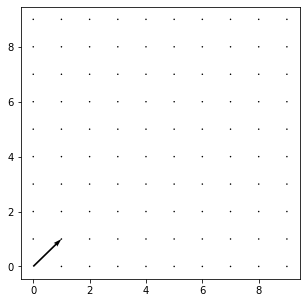

In [240]:
plot_flows(c[3])

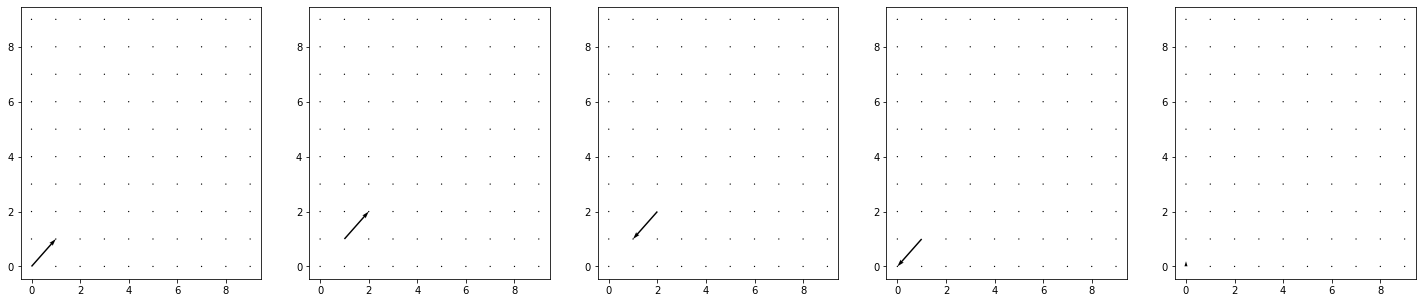

In [180]:
comp_itk = compose_sitk(ff_empty[0],[0],'forward')
plot_flows(flows)

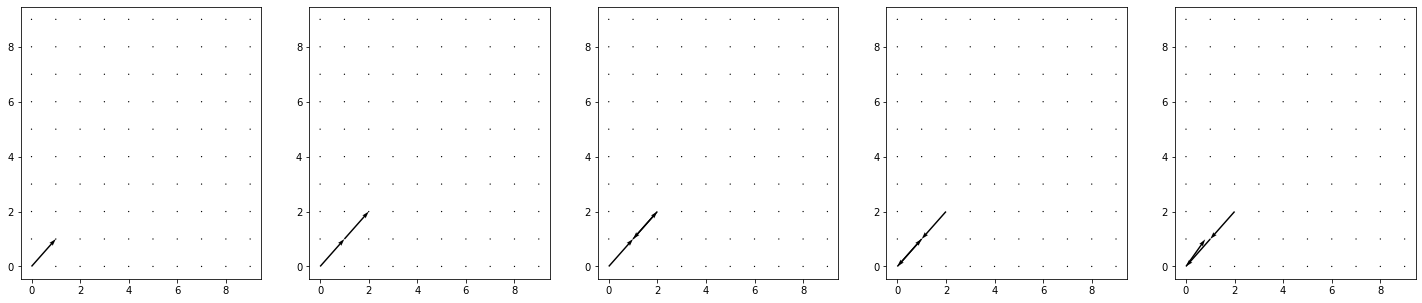

In [181]:
plot_flows(np.split(comp_itk, indices_or_sections=5, axis=0))

In [182]:
comp_itk[1,0,0:5,0:5,:]

array([[[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])